<a href="https://colab.research.google.com/github/LatentBhindi/Project/blob/main/isitbird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastbook

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1

In [3]:
from fastbook import *

In [4]:
urls = search_images_ddg('bird photos', max_images = 1)
len(urls), urls[0]

(1,
 'http://hdwallpapers2013.com/wp-content/uploads/2012/10/birds-wallpaper-free-download.jpg')

In [5]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress = True)

In [6]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

In [7]:
if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(parents= True, exist_ok = True)
        try:
                results = search_images_ddg(f'{o} photo')
                download_images(dest, urls=results[:50])
                resize_images(dest, max_size=400, dest=dest, max_workers=2)
        except Exception as e:
                logger.error(f"Error processing search term '{o}': {e}")

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

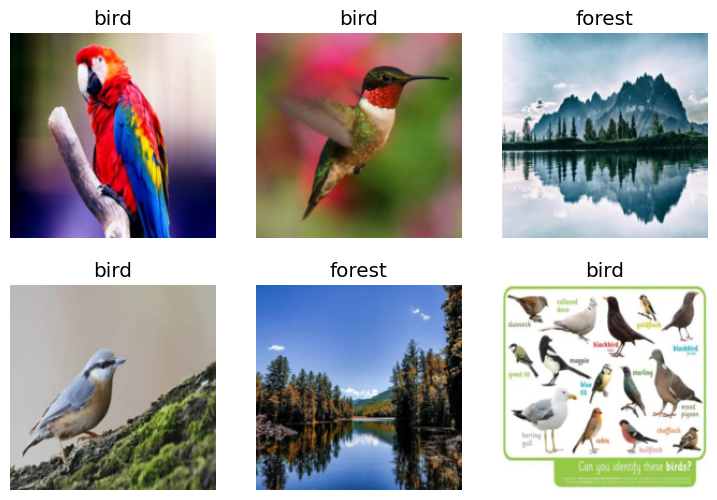

In [12]:
try:
  dls.show_batch(max_n=6)
except OSError as e:
  if "truncated" in str(e):
    print(f"Encountered corrupted image during batch show. Skipping...")
  else:
    raise e

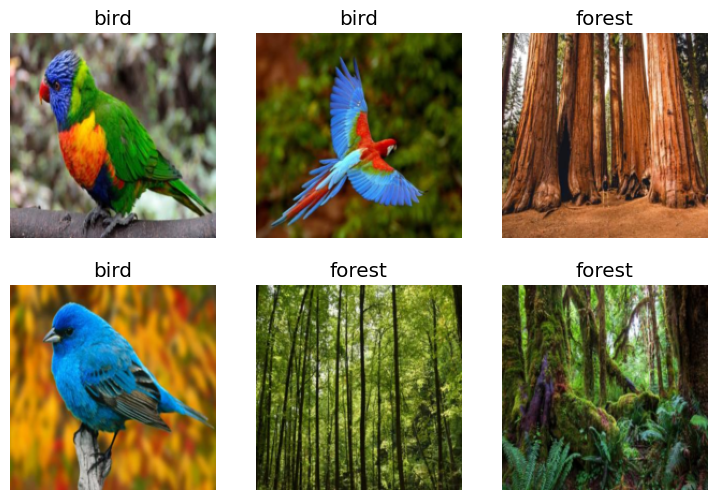

In [13]:
dls.show_batch(max_n=6)

In [15]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.303024,1.610796,0.666667,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.292376,1.436430,0.722222,00:15
1,1.111786,1.030773,0.555556,00:15
2,0.763168,0.573628,0.277778,00:15
3,0.575118,0.319496,0.166667,00:15
4,0.457944,0.170411,0.111111,00:17


In [16]:
is_bird, _ , probs = learn.predict(PILImage.create('bird.jpg'))

In [17]:
print({is_bird})
print(probs)

{'bird'}
tensor([1.0000e+00, 2.0477e-06])
